In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the IRIS data set
data = pandas.read_csv( 'Fisher.csv' )
m = data.as_matrix()

# Separate the labels and features from the dataset
labels = m[:,0]
labels[ labels==2 ] = 1  # squash class 2 into class 1
labels = np.matrix( labels )
features = m[:,1:5]

# Add a column of ones to add a bias
x = np.hstack([features,np.ones([len(features),1])])

def get_accuracy(labels,x,w):
    
    num_examples = labels.size
    error = 0
    for example in xrange(0,num_examples):
        z = np.sign(np.dot(w,x[example].T)) # Run the classifier
        z = np.where(z<0,0,z)
        
        # Calculate the accuracy
        error = error + np.abs(labels[0,example]-z)
        
    accuracy = (num_examples-error)/num_examples*100.0
    return accuracy


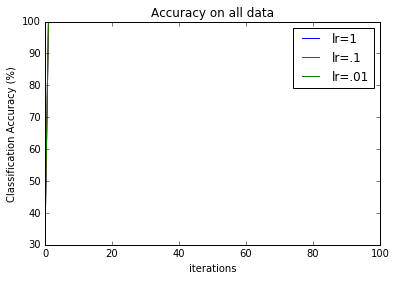

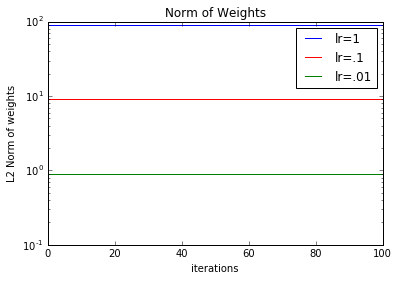

In [2]:
# Get the size of x
[rows,cols] = x.shape

learning_rates = [1,.1,0.01]

iterations = 100

l2_norms = np.zeros([len(learning_rates),iterations])
accuracies = np.zeros([len(learning_rates),iterations])

for rate in xrange(0,len(learning_rates)):

    c = learning_rates[rate]
    # initialize the weights
    w = np.random.randn(1,cols)*0.0


    for j in xrange(0,iterations):
        # Calculate the accuracy
        accuracies[rate,j] = get_accuracy(labels,x,w)
        
        for k in xrange(0,rows):
            z = np.sign(np.dot(w,x[k].T)) # Run the classifier
            z = np.where(z<0,0,z)

            w = w + c*(labels[0,k]-z)*x[k,:] # Update the weights


        
        # Calculate the norm of w
        l2_norm = np.linalg.norm(w)
        l2_norms[rate,j] = l2_norm
        
t = np.linspace(0,iterations,iterations)
    
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.plot(t,accuracies[0,:],'b',t,accuracies[1,:],'r',t,accuracies[2,:],'g')
ax.set_xlabel('iterations')
ax.set_ylabel('Classification Accuracy (%)')
ax.legend(['lr=1','lr=.1','lr=.01'])
ax.set_title('Accuracy on all data')
plt.show()


fig = plt.figure(2)
ax = fig.add_subplot(111)
plt.plot(t,l2_norms[0,:],'b',t,l2_norms[1,:],'r',t,l2_norms[2,:],'g')
ax.set_xlabel('iterations')
ax.set_ylabel('L2 Norm of weights')
ax.legend(['lr=1','lr=.1','lr=.01'])
ax.set_title('Norm of Weights')
ax.set_yscale('log')
plt.show()
  
    

    


In [3]:
def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.matrix( labels )
 
# squash classes 0-4 into class 0, and squash classes 5-9 into class 1
labels[ labels < 5 ] = 0
labels[ labels >= 5 ] = 1

# Add a column of ones to add a bias
x = np.matrix(np.hstack([features,np.ones([len(features),1])]))

In [ ]:
# Get the size of x
[rows,cols] = x.shape

learning_rates = [.001,.00001]

iterations = 100

l2_norms = np.zeros([len(learning_rates),iterations])
accuracies = np.zeros([len(learning_rates),iterations])

for rate in xrange(0,len(learning_rates)):

    c = learning_rates[rate]
    # initialize the weights
    w = np.random.randn(1,cols)*0

    for j in xrange(0,iterations):
        # Calculate the accuracy
        accuracies[rate,j] = get_accuracy(labels,x,w)
        
        for k in xrange(0,rows):
            z = np.sign(np.dot(w,x[k].T)) # Run the classifier
            z = np.where(z<0,0,z)

            w = w + c*(labels[0,k]-z)*x[k,:] # Update the weights
        
        # Calculate the norm of w
        l2_norm = np.linalg.norm(w)
        l2_norms[rate,j] = l2_norm
        
t = np.linspace(0,iterations,iterations)
    
fig = plt.figure(1)
ax = fig.add_subplot(111)
plt.plot(t,accuracies[0,:],'b',t,accuracies[1,:],'r')
ax.set_xlabel('iterations')
ax.set_ylabel('Classification Accuracy (%)')
ax.legend(['lr=.001','lr=.00001'])
ax.set_title('Accuracy on all data')
plt.show()


fig = plt.figure(2)
ax = fig.add_subplot(111)
plt.plot(t,l2_norms[0,:],'b',t,l2_norms[1,:],'r')
ax.set_xlabel('iterations')
ax.set_ylabel('L2 Norm of weights')
ax.legend(['lr=.001','lr=.00001'])
ax.set_title('Norm of Weights')
ax.set_yscale('log')
plt.show()